# Assignment 1: Image Manipulation and Canny Edge Detection

---

Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

In this notebook, we practice some basic image manipulation techniques in OpenCV including Canny edge detection. These are the foundation of later computer vision applications.

In [10]:
# install required packages specified in pipfile
!pipenv install

/bin/bash: line 1: pipenv: command not found


In [11]:
# imports
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import cv2

Task 1: Basic Image Manipulation in OpenCV
=

**TODO**: 1a) Load a color image of your choice, preferably a picture you took yourself. Convert it to a color format of your choice, and display it. **(1.5 points)**

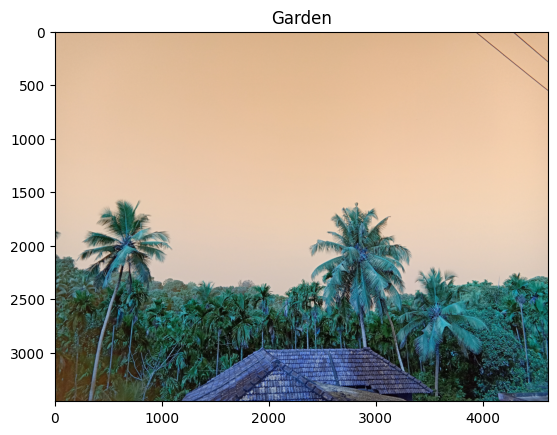

In [9]:
##### TODO: YOUR CODE GOES HERE
input_image=cv2.imread("/content/IMG20200204091028.jpg",1)


plt.show()
color_format = 'BGR'
if color_format!='BGR':
  image_converted = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
else:
  image_converted=input_image

plt.imshow(image_converted)
plt.title('Garden')
plt.show()

**TODO**: 1b) Color the 10th pixel row of the image in red. Plot the upper left 500x500 pixel image cutout to verify your result. **(2 points)**

Hint: Indexing starts at 0 in Python! Remember the image origin is in the upper left image corner.

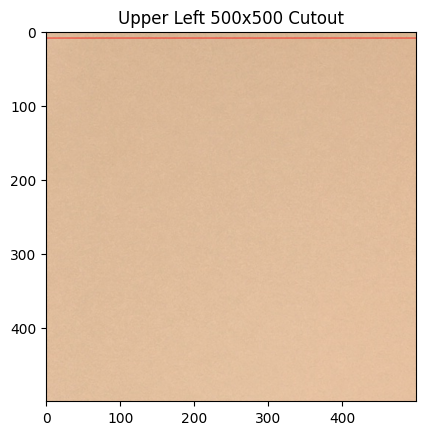

In [12]:
##### TODO: YOUR CODE GOES HERE
input_image[9, :] = [255, 0, 0]
cutout = input_image[0:500, 0:500]
plt.imshow(cutout)
plt.title('Upper Left 500x500 Cutout')
plt.show()


**TODO**: 1c) Print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row. **(2 points)**

In [13]:
##### TODO: YOUR CODE GOES HERE
rightmost_pixel_9th_row = input_image[8, -1]
leftmost_pixel_10th_row = input_image[9, 0]
print("Rightmost Pixel (9th Row):", rightmost_pixel_9th_row)
print("Leftmost Pixel (10th Row):", leftmost_pixel_10th_row)

Rightmost Pixel (9th Row): [230 191 153]
Leftmost Pixel (10th Row): [255   0   0]


**TODO**: 1d) Flatten the image, i.e., convert it from the 3D array to a 1D
array. Find at least two different commands that achieve the desired result.
Check your output with `shape`. **(3 points)**

In [14]:
##### TODO: YOUR CODE GOES HERE
# 1st method
flattened_image=input_image.flatten()
print("Original",input_image.shape)
print("Flattened",flattened_image.shape)

# 2nd method
to_flatten_image=input_image.ravel()
print("Original",input_image.shape)
print("Flattened image",to_flatten_image.shape)

Original (3456, 4608, 3)
Flattened (47775744,)
Original (3456, 4608, 3)
Flattened image (47775744,)


**TODO**: 1e) As before, print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row, but use the flattened image now. Verify that the result is the same as before. **(2 points)**

In [15]:
##### TODO: YOUR CODE GOES HERE
rightmost_pixel_9th_row = flattened_image[8 * input_image.shape[1] - 1]
leftmost_pixel_10th_row = flattened_image[9 * input_image.shape[1]]
print("Rightmost Pixel (9th Row):", rightmost_pixel_9th_row)
print("Leftmost Pixel (10th Row):", leftmost_pixel_10th_row)

Rightmost Pixel (9th Row): 141
Leftmost Pixel (10th Row): 217


**TODO**: 1f) Split the three color channels and display them separately. Can you see from the plotted images which color channel is displayed in which image (without looking at the code), or do the three channels not differ much? Write your answer in the markdown cell below the code. **(2 points)**

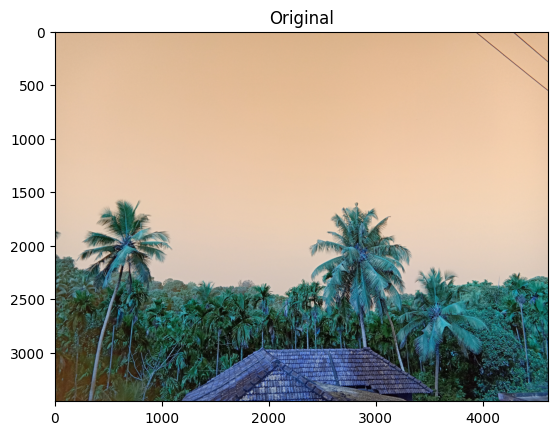

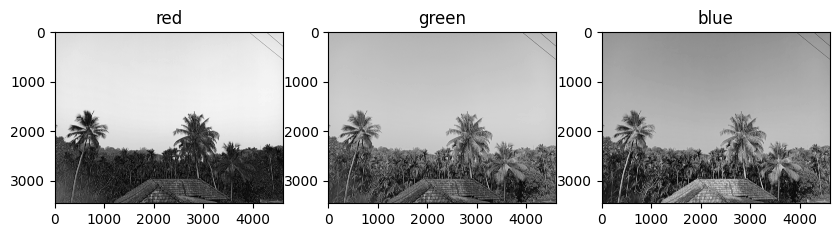

In [16]:
##### TODO: YOUR CODE GOES HERE
r,g,b=cv2.split(input_image)
plt.imshow(input_image)
plt.title("Original")
fig, (ax1,ax2,ax3)= plt.subplots(1,3, figsize=(10,30))
ax1.imshow(r,cmap = 'gray')
ax1.title.set_text('red')
ax2.imshow(g,cmap = 'gray')
ax2.title.set_text('green')
ax3.imshow(b,cmap = 'gray')
ax3.title.set_text('blue')




#We can identify the color channels based on the below points:
#Images with prominent red elements might appear brighter in the grayscale representation of the Red channel compared to the Green and Blue channels.
#Images with significant green elements would show a brighter intensity in the grayscale Green channel.
#Images with dominant blue elements would be more prominent in the grayscale Blue channel.

**YOUR ANSWER**:

ask 2: Edge Detection
=

**TODO**: 2a) Choose a part of the image that you find interesting for later corner and edge detection. Store the cutout in a new grayscale image. **(1 point)**

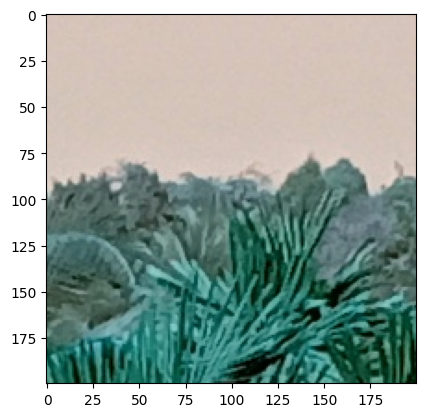

In [17]:
# Defining the region of interest (ROI)
x, y, w, h = 1500, 2300, 200, 200  # Example: x, y coordinates and width, height of the ROI
roi = input_image[y:y+h, x:x+w]

# Converting ROI to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

plt.imshow(roi)



**TODO**: 2b) Find a part of the cutout that you think might be difficult to detect edges in with Canny. Mark this part in the grayscale cutout with a red square. Write a short explanation why this could be difficult below. **(2 points)**

Hint: Note that you cannot plot color into a grayscale image. One option is to convert the grayscale image to RGB first, using `COLOR_GRAY2RGB`.

array([[[195, 195, 195],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [195, 195, 195],
        [194, 194, 194],
        [194, 194, 194]],

       [[196, 196, 196],
        [196, 196, 196],
        [195, 195, 195],
        ...,
        [194, 194, 194],
        [194, 194, 194],
        [193, 193, 193]],

       [[197, 197, 197],
        [196, 196, 196],
        [195, 195, 195],
        ...,
        [196, 196, 196],
        [196, 196, 196],
        [195, 195, 195]],

       ...,

       [[139, 139, 139],
        [146, 146, 146],
        [147, 147, 147],
        ...,
        [ 18,  18,  18],
        [ 43,  43,  43],
        [ 26,  26,  26]],

       [[128, 128, 128],
        [138, 138, 138],
        [155, 155, 155],
        ...,
        [ 13,  13,  13],
        [ 22,  22,  22],
        [ 25,  25,  25]],

       [[100, 100, 100],
        [130, 130, 130],
        [153, 153, 153],
        ...,
        [ 29,  29,  29],
        [ 18,  18,  18],
        [ 11,  11,  11]]], dtype=uint8)
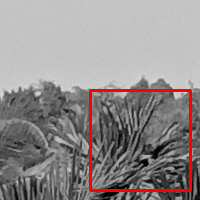

In [18]:
'''
Explanation why detection could be difficult -
We selected the area between the sky and the palm leaves which can be challenging for edge detection because of some reasons below -
1. Similar color or texture variations between adjacent regions makes it difficult to accurately detect the boundaries
2. The palm leaves overlap or are densely packed, leading to less reliable edge detection
'''


# Converting grayscale to RGB
rgb_image = cv2.cvtColor(gray_roi, cv2.COLOR_GRAY2RGB)

# Specifying color for rectangle
color = (255, 0, 0)

x, y, w, h = 90, 90, 100, 100  # Example: x, y coordinates and width, height of the ROI

# Drawing a rectangle
cv2.rectangle(rgb_image, (x, y), (x + w, y + h), color, thickness=2)



**YOUR ANSWER**:

**TODO**: 2c) Resize the gray cutout to 1/4th of the original size, keeping the aspect ratio. Plot both grayscale images next to each other using Matplotlib's `subplots`.

Text(0.5, 1.0, 'Resized Grayscale Image (1/4th of original size)')

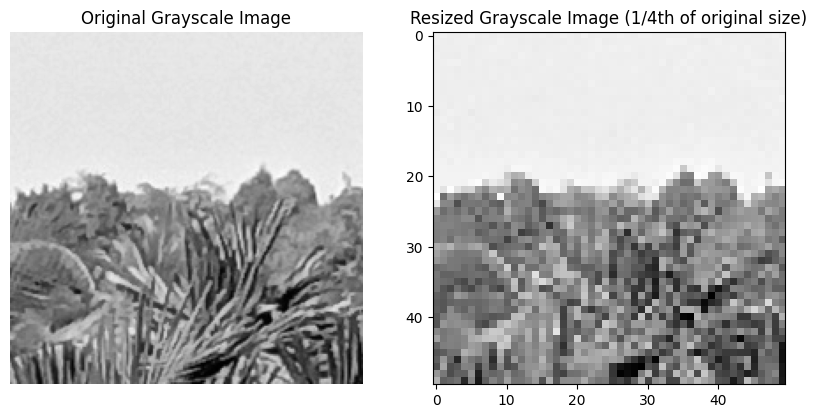

In [19]:
##### TODO: YOUR CODE GOES HERE
# Resizing the grayscale image to 1/4th of the original size while maintaining aspect ratio
resized_gray_image = cv2.resize(gray_roi, (0, 0), fx=0.25, fy=0.25)

# Plotting both grayscale images side by s  ide using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_roi, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_gray_image, cmap='gray')
plt.title('Resized Grayscale Image (1/4th of original size)')


**TODO**: 2d) Apply Gaussian blur with a kernel of size 9 to the resized image and plot the result. **(1 point)**

Text(0.5, 1.0, 'Blurred Image (Gaussian Blur, kernel size = 9)')

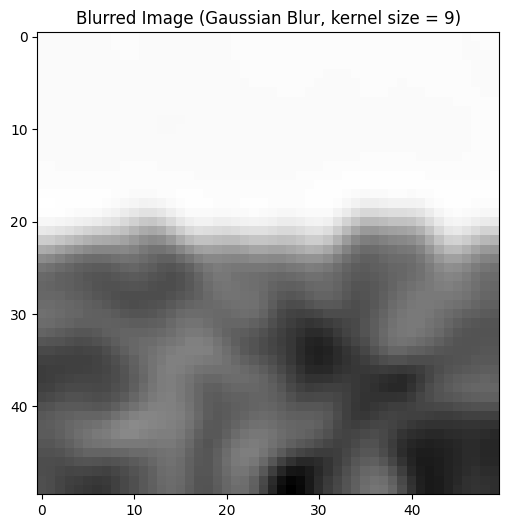

In [20]:
##### TODO: YOUR CODE GOES HERE
# Applying Gaussian blur with a kernel size of 9
blurred_image = cv2.GaussianBlur(resized_gray_image, (9, 9), 0)

# Plotting the blurred image
plt.figure(figsize=(6, 6))
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image (Gaussian Blur, kernel size = 9)')


**TODO**: 2e) Detect the edges in the blurred cutout using Canny edge detector. Adapt the Canny thresholds for an optimal result. Plot the edges in blue into the grayscale cutout. **(3 points)**

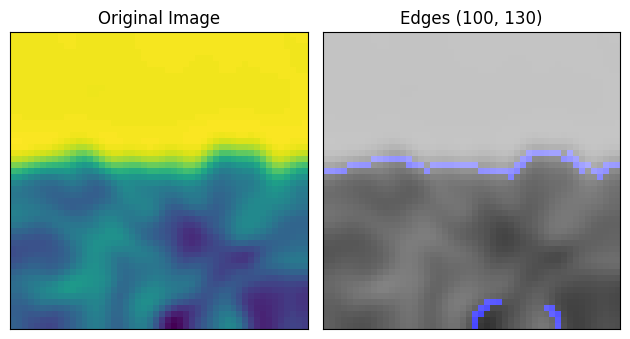

In [29]:
##### TODO: YOUR CODE GOES HERE
# Detecting edges using Canny edge detector
edges1 = cv2.Canny(blurred_image, 100, 130)

# Converting the grayscale image to RGB
grayscale_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_GRAY2RGB)

# Convert edges to RGB color
edges1rgb = cv2.cvtColor(edges1, cv2.COLOR_GRAY2RGB)

# Make the edges blue
edges1rgb *= np.array((0, 0, 1), np.uint8)

# Overlay the colored edges on the original image
overlay = np.bitwise_or(grayscale_image_rgb, edges1rgb)

plt.subplot(1, 2, 1)
plt.imshow(blurred_image )
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(overlay)
plt.title('Edges (100, 130)')
plt.xticks([])
plt.yticks([])


plt.tight_layout()
plt.show()

**TODO**: 2f) Check if your prediction of difficulty was correct. Do you see a) real edges that were missed by Canny (false negatives) or b) detected edges that are not there in reality (false positives)? Try to experiment with the Canny thresholds and solve these difficulties. How did you try to solve the difficulties? Write your answer below the code. **(1.5 points)**



```
# Detecting edges using Canny edge detector for different thresholds below -
edges1 = cv2.Canny(blurred_image, 100, 130)
edges2 = cv2.Canny(blurred_image, 30, 90)
edges3 = cv2.Canny(blurred_image, 150, 180)
```

**YOUR ANSWER**:

a) Real edges that were missed by Canny (false negatives) were observed in regions of the area between the palm leaves. Using thresholds of (30, 90), more edges were accurately detected.

b) The false positives were not predicted in this case.

c) Experimenting with different Canny thresholds revealed that lower thresholds (30, 90) provided the best results outperforming the previously chosen thresholds (100, 130). By lowering the thresholds, weaker edges in leaves were detected.

Conversely, higher thresholds (150, 180) produced less accurate results, with edge detection being far off from the actual edges.



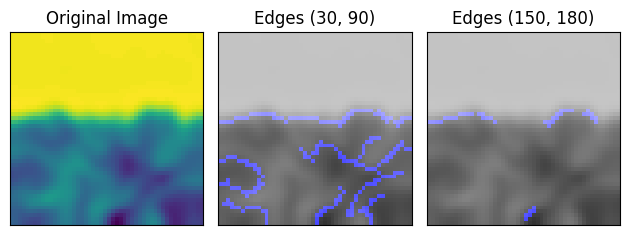

In [27]:
# Detecting edges using Canny edge detector for different thresholds
edges2 = cv2.Canny(blurred_image, 30, 90)
edges3 = cv2.Canny(blurred_image, 150, 180)

# Converting the grayscale image to RGB
grayscale_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_GRAY2RGB)


# Convert edges to RGB color
edges2rgb = cv2.cvtColor(edges2, cv2.COLOR_GRAY2RGB)
edges3rgb = cv2.cvtColor(edges3, cv2.COLOR_GRAY2RGB)

# Make the edges blue
edges2rgb *= np.array((0, 0, 1), np.uint8)
edges3rgb *= np.array((0, 0, 1), np.uint8)

# Overlay the colored edges on the original image
overlay2 = np.bitwise_or(grayscale_image_rgb, edges2rgb)
overlay3 = np.bitwise_or(grayscale_image_rgb, edges3rgb)

plt.subplot(1, 3, 1)
plt.imshow(blurred_image )
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(overlay2)
plt.title('Edges (30, 90)')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(overlay3)
plt.title('Edges (150, 180)')
plt.xticks([])
plt.yticks([])


plt.tight_layout()
plt.show()

Well done, you are now able to apply basic image manipulation techniques as well as Canny edge detection to images in OpenCV!

Task 3: Theory Questions
=

**TODO**: 3a) What is the problem of applying image derivatives for edge detection in noisy images? What is a possible solution to that problem? Can you give an example in which you often get noise when taking a photo? **(3 points)**

**YOUR ANSWER**:

  **Problem**: Derivatives identifies the edge based on the changes in intensity of the pixels. Noisy image has high amount of the changes and it can be interpreted as the edges.

  **Example: Noisy signal edge detection**
  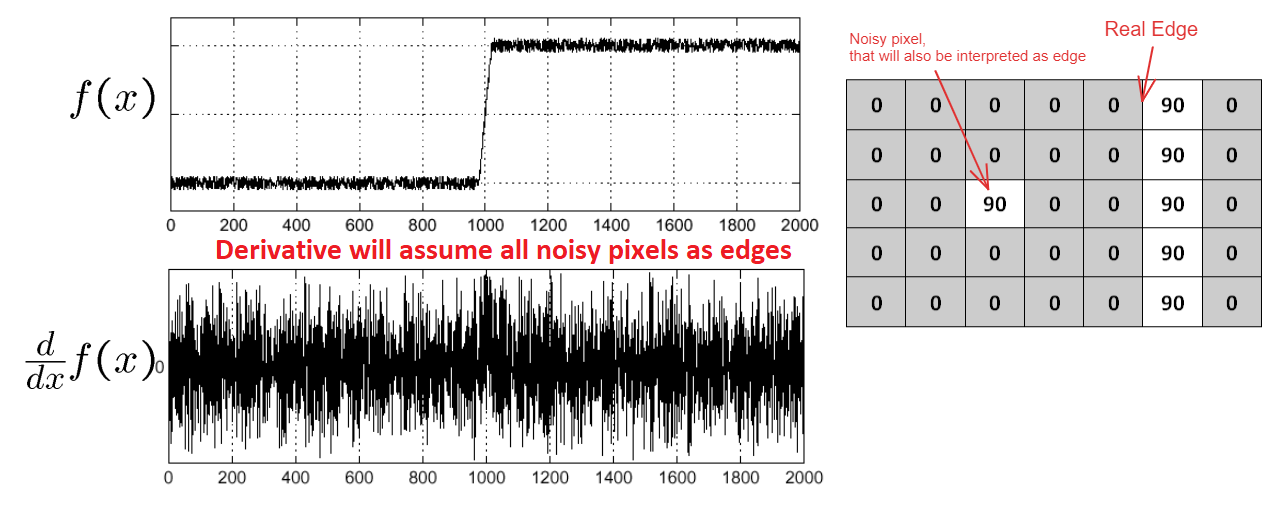

**Solution of the problem:** To avoid this problem noise can be removed or reduced so the values of derivatives of the pixel will be less resulting in it being not considered as an edge.

**Smoothening the signal to remove noise**

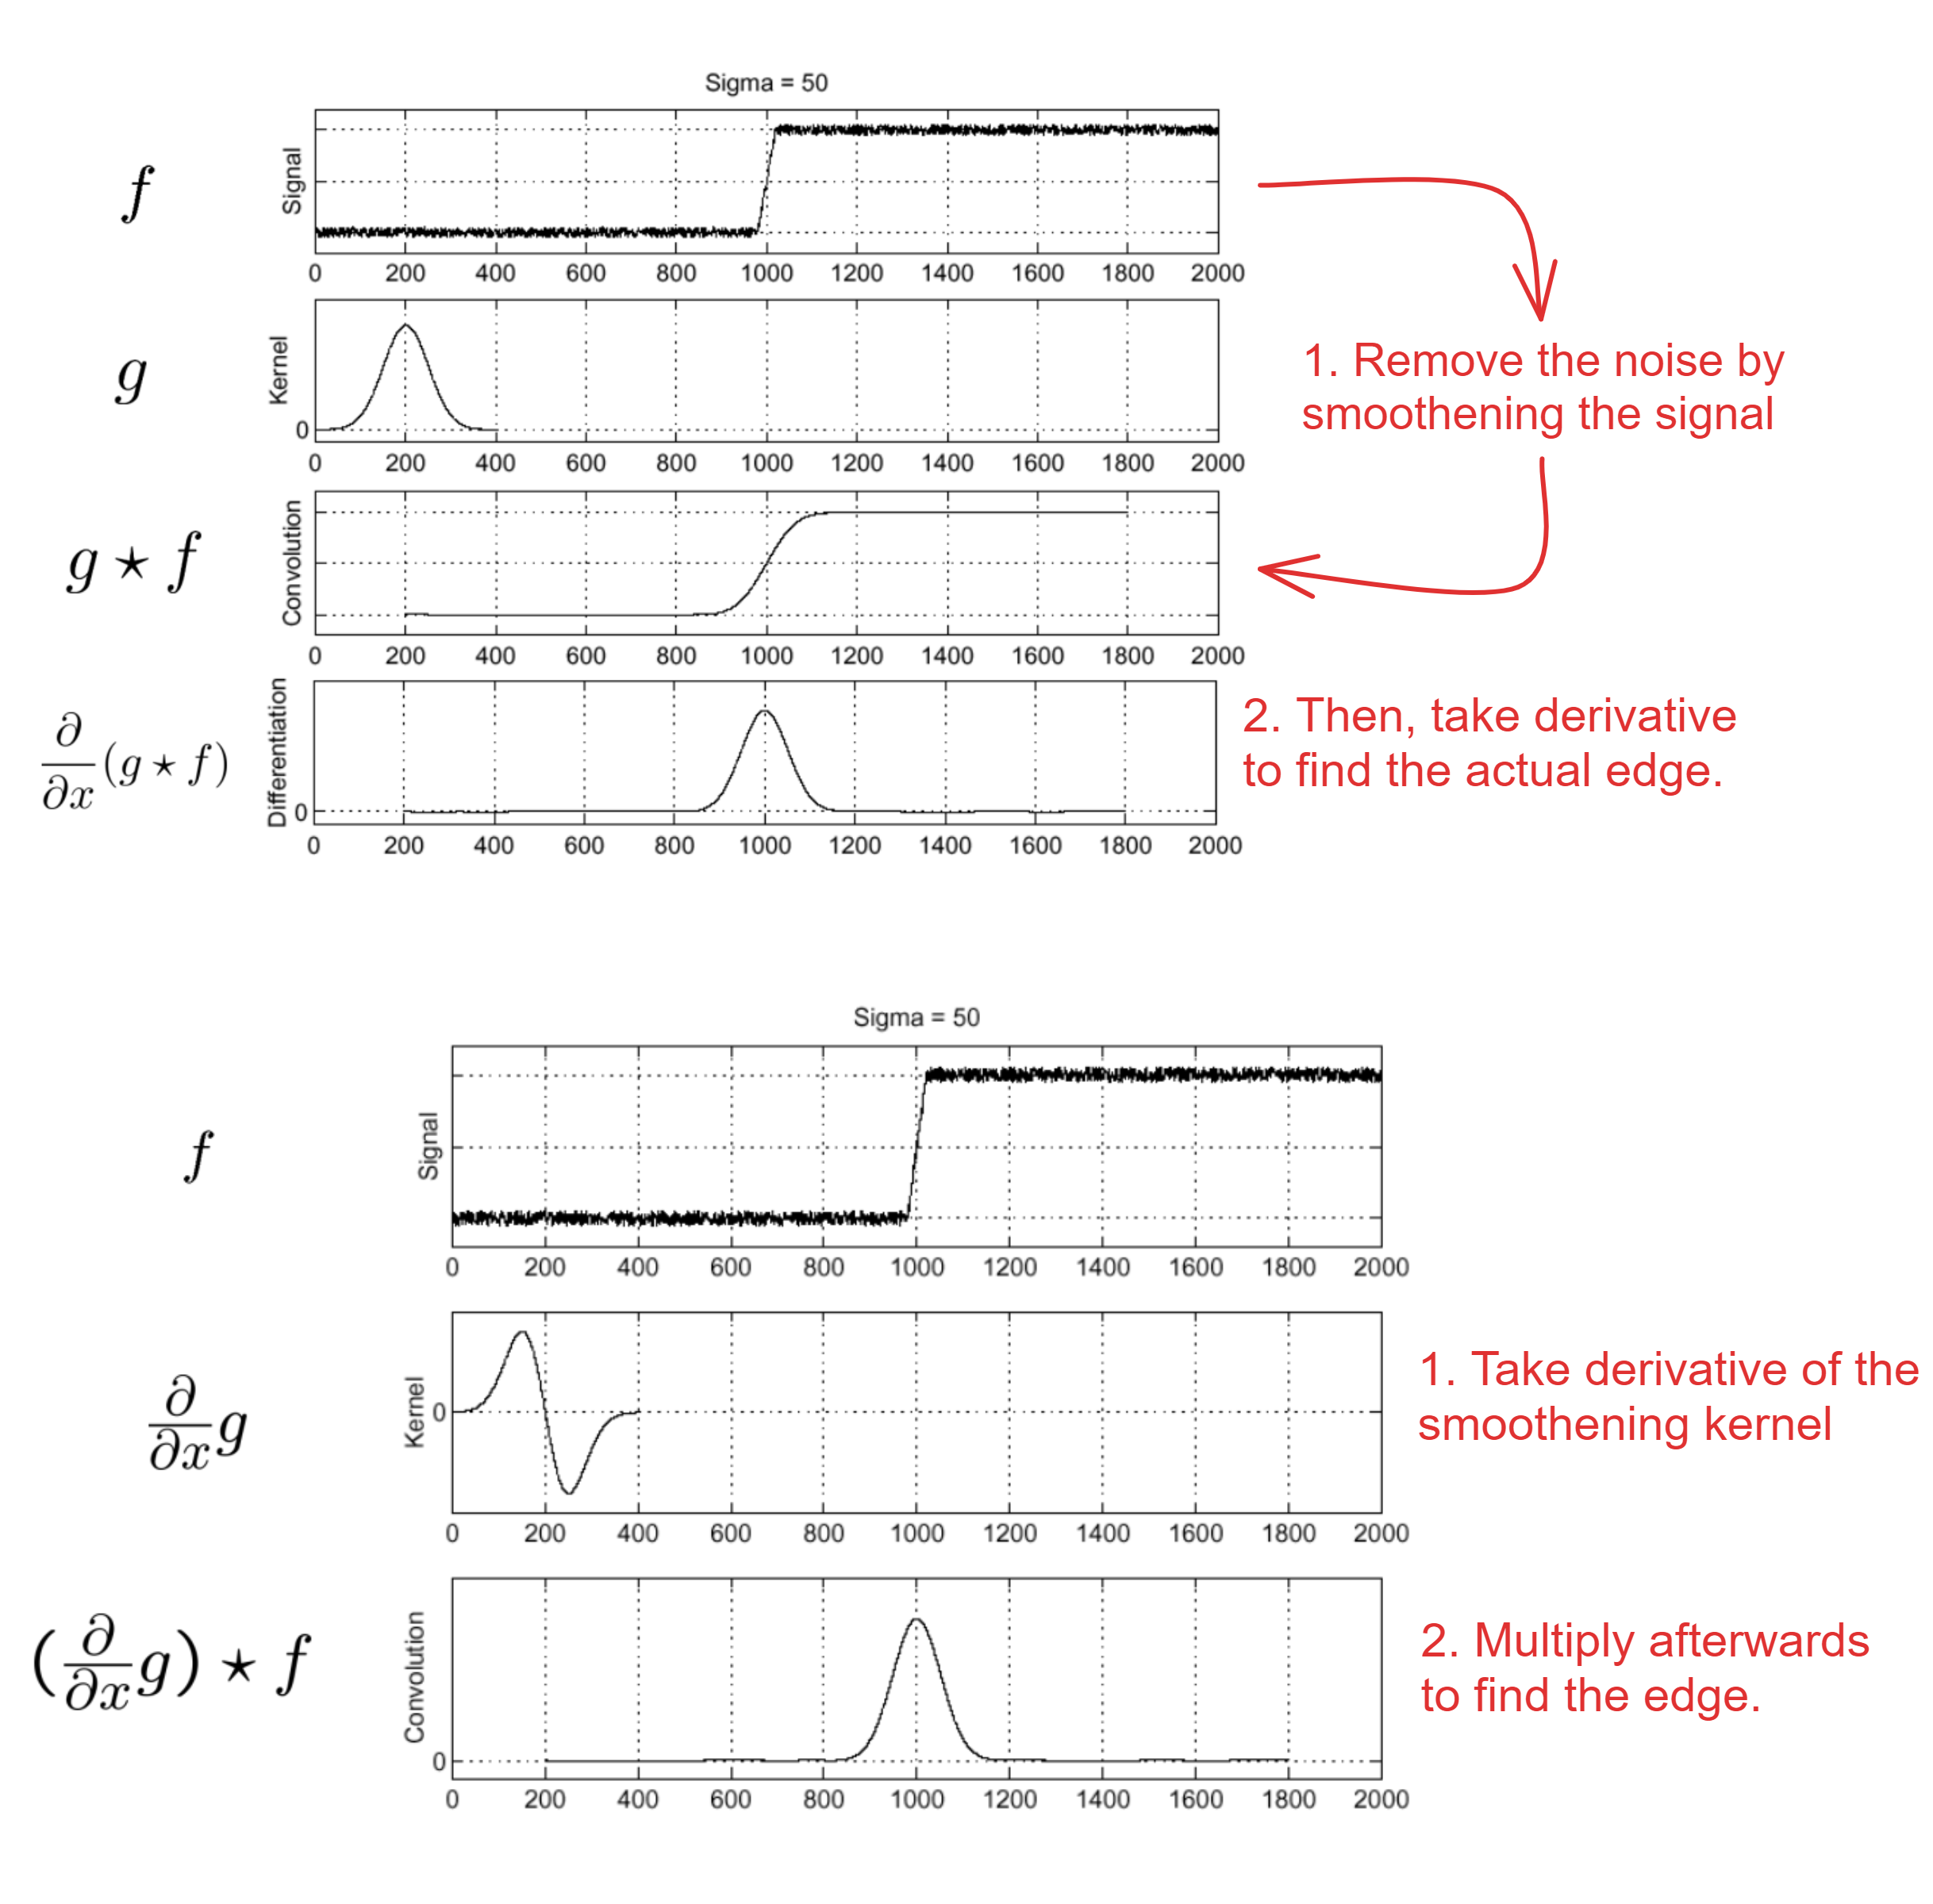

**Example of noise in the Image:** Generally there is noise in the image due to one or multiple reasons from below mentioned list
- Light is not proper.
- Camera is too zoomed in to capture the object at long distance.
- Quality of the camera sensor is poor.
- Noise in surroundings such as dust, smoke or particals on camera lens.

**TODO**: 3b) You are given a 3×3 pixel input image $
\begin{array}{|ccc|}
\hline
 1 & 2 & 3  \\
 4 & 5 & 6  \\
 7 & 8 & 9  \\
\hline   
\end{array}$
and a 3×3 pixel filter $\begin{array}{|ccc|}
\hline
 -1 & 0 & 1  \\
 -1 & 0 & 1  \\
 -1 & 0 & 1  \\
\hline   
\end{array}$. Compute the 3 × 3 pixel result image of the correlation of the filter with the input image. All pixels outside the input image are padded with zeros. **(4.5 points)**

**YOUR ANSWER**:
$
\begin{array}{|ccc|}
\hline
 7 & 4 & -7  \\
 15 & 6 & -15  \\
 13 & 4 & -13  \\
\hline   
\end{array}$

**TODO**: 3c) What patterns does this special filter respond to? How can you see this in the result from 3b)? **(2 points)**

**YOUR ANSWER**: In this filter the first column and third column pixels are opposite values of eachother and this pattern also reflects in result. resulting in first and last column pixel values of result image to be opposite value of eachother.

**Example:** in filter top-left pixel value is **-1** and top-right is **1**. and in result image top-left pixel value is **7** and top-right is **-7**

**TODO**: 3d) Please calculate the result using the settings from task 3b), but with convolution instead of correlation. **(4.5 points)**

**YOUR ANSWER**:
$
\begin{array}{|ccc|}
\hline
 -7 & -4 & 7  \\
 -15 & -6 & 15  \\
 -13 & -4 & 13  \\
\hline   
\end{array}$
